In [ ]:
from keras.layers import Input, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Dense, Activation, add, Flatten, GlobalAveragePooling2D, Reshape, multiply
from keras.models import Model

import numpy as np
import tensorflow as tf
from keras.utils import np_utils

width = 32
height = 32

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
y_train.shape

(50000, 1)

In [ ]:
num_classes = 10
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
validation_images, validation_labels = x_train[:500], y_train[:500]
train_images, train_labels = x_train[500:], y_train[500:]

In [ ]:
y_train.shape

(50000, 10)

In [ ]:
def Residual_Block(x, filter):

    x_skip = x 
    f= filter

    x = Conv2D(f, kernel_size=(3,3), strides=1, padding='same')(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Conv2D(f, kernel_size=(3,3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x_skip = Conv2D(f, kernel_size=(1,1),strides=(1,1),padding='same')(x_skip)
    x_skip = BatchNormalization()(x_skip)    


    x = add([x, x_skip])
    x = Activation('relu')(x)    
    
    return x


In [ ]:
def Residual_Block_50(x, filters):
    f1, f2 = filters
    x_skip = x 

    x = Conv2D(f1, kernel_size=(1,1), strides=1, padding='same')(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f1, kernel_size=(3,3), strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(f2, kernel_size=(1,1), strides=1, padding='same')(x) 
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x_skip = Conv2D(f2, kernel_size=(1,1),strides=(1,1),padding='same')(x_skip)
    x_skip = BatchNormalization()(x_skip)  

    x = add([x, x_skip])
    x = Activation('relu')(x)    
    return x

https://github.com/tensorflow/tensorflow/blob/v2.3.1/tensorflow/python/keras/applications/resnet.py

In [ ]:

inputs = Input(shape=(32,32,3))
x = Conv2D(64, kernel_size=7, strides=2, padding='valid')(inputs)
x = MaxPooling2D(pool_size=(3,3), strides=2, padding='same')(x)

for i in range(3):
  x = Residual_Block_50(x, filters=(64,256)) 

for i in range(4):
  x = Residual_Block_50(x, filters =(128,512)) 

for i in range(6):
  x = Residual_Block_50(x, filters =(256,1024)) 

for i in range(3):
  x = Residual_Block_50(x, filters =(512,2048)) 



# x = Residual_Block(x, filter = 64)
# x = Residual_Block(x, filter = 64)

# x = Residual_Block(x, filter = 128)
# x = Residual_Block(x, filter = 128)

# x = Residual_Block(x, filter = 256)
# x = Residual_Block(x, filter = 256)

# x = Residual_Block(x, filter = 512)
# x = Residual_Block(x, filter = 512)


x = GlobalAveragePooling2D()(x) 

outputs = Dense(10, activation = 'softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_1 (Conv2D)              (None, 13, 13, 64)   9472        ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 7, 7, 64)    0           ['conv2d_1[0][0]']               
                                                                                                  
 conv2d_2 (Conv2D)              (None, 7, 7, 64)     4160        ['max_pooling2d_1[0][0]']        
                                                                                              

In [ ]:
from keras.preprocessing.image import ImageDataGenerator


train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

validation_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [ ]:
train_datagen.fit(train_images)
validation_datagen.fit(validation_images)

In [ ]:
history = model.fit_generator(train_datagen.flow(train_images,train_labels, batch_size = 32), 
                    validation_data = validation_datagen.flow(validation_images, validation_labels, batch_size = 32),
                    epochs = 10)

<ipython-input-13-2a75ee7e08c3>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_datagen.flow(train_images,train_labels, batch_size = 32),


Epoch 1/10
1547/1547 [==============================] - 273s 158ms/step - loss: 1.9204 - accuracy: 0.3076 - val_loss: 1.9564 - val_accuracy: 0.3400
Epoch 2/10
1547/1547 [==============================] - 239s 155ms/step - loss: 1.5482 - accuracy: 0.4384 - val_loss: 1.4565 - val_accuracy: 0.4640
Epoch 3/10
1547/1547 [==============================] - 239s 154ms/step - loss: 1.3924 - accuracy: 0.5013 - val_loss: 1.3995 - val_accuracy: 0.4860
Epoch 4/10
1547/1547 [==============================] - 238s 154ms/step - loss: 1.2716 - accuracy: 0.5495 - val_loss: 1.2660 - val_accuracy: 0.5740
Epoch 5/10
1547/1547 [==============================] - 237s 154ms/step - loss: 1.1587 - accuracy: 0.5906 - val_loss: 1.1885 - val_accuracy: 0.5700
Epoch 6/10
1547/1547 [==============================] - 238s 154ms/step - loss: 1.0718 - accuracy: 0.6221 - val_loss: 1.1606 - val_accuracy: 0.5860
Epoch 7/10
1547/1547 [==============================] - 238s 154ms/step - loss: 1.0000 - accuracy: 0.6479 - val_

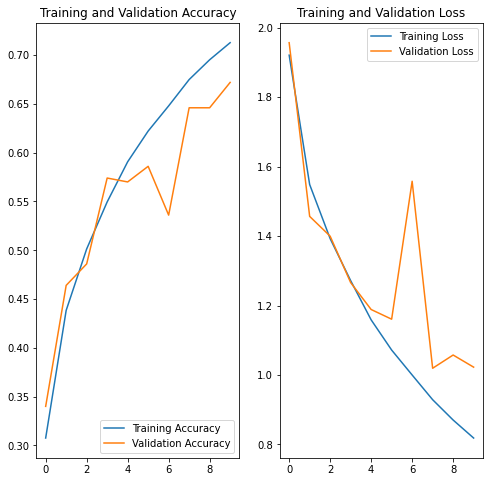

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()